In [1]:
import pandas as pd
import geopandas as gpd
from datetime import date, datetime
import os
import re

pd.options.display.max_columns = None

In [121]:
fires = pd.DataFrame()
pathname = '../data'

for filename in os.listdir(pathname):
    if os.path.isfile(os.path.join(pathname, filename)) and 'Confirmed' in filename:
        if os.path.splitext(filename)[1] == '.csv':
            fires = pd.concat([fires, pd.read_csv(os.path.join(pathname, filename))], ignore_index=True)

fires = fires.drop('OBJECTID', axis=1).drop_duplicates()

In [122]:
def strip_time(entry):
    m = re.match('(\d{4}/\d{2}/\d{2})', entry)
    return m.group(1)

In [123]:
fires['confirmed_fire'] = True
fires['alarm_datetime'] = fires.apply(lambda row: strip_time(row.alm_date) + ' ' + row.alm_time, axis=1)
fires['clear_datetime'] = fires.apply(lambda row: strip_time(row.clr_date) + ' ' + row.clr_time, axis=1)
fires['alarm_datetime'] = pd.to_datetime(fires['alarm_datetime'])
fires['clear_datetime'] = pd.to_datetime(fires['clear_datetime'])

fires['alm_date'] = fires['alm_date'].apply(strip_time)
fires['clr_date'] = fires['clr_date'].apply(strip_time)

fires = fires.drop(['alm_time', 'clr_time', 'X', 'Y', 'LastUpdateDate', 'StartDate', 'EndDate'], axis=1)
fires = fires.sort_values('inci_no')



fires.head()

FID     inci_no                                           descript  \
38236  NaN  0026882     Dumpster or other outside trash receptacle fir...   
38237  NaN  0026886     Dumpster or other outside trash receptacle fir...   
38238  NaN  0027005     Outside rubbish, trash or waste fire          ...   
38239  NaN  0027024     Outside rubbish, trash or waste fire          ...   
38240  NaN  0027067     Excessive heat, scorch burns with no ignition ...   

         alm_date station number_                     street st_type  \
38236  2016/08/02     21      NaN  38                           ST     
38237  2016/08/02     06      NaN  Franklin                     AVE    
38238  2016/08/02     07      NaN  Elliot                       AVE    
38239  2016/08/03     05      NaN  Cedar                        AVE    
38240  2016/08/03     21      NaN  Lake                         ST     

      st_suffix                                    addr_2         apt_room  \
38236        E                                                               
38237        W                                                               
38238        S                                                               
38239        S                                                               
38240        E                                                               

      xst_prefix                    xstreet xst_type xst_suffix  latitude  \
38236                                                                 0.0   
38237         S   Hennepin                      AVE                   0.0   
38238                                                                 0.0   
38239         E   Lake                          ST                    0.0   
38240                                                                 0.0   

       longitude inci_type    clr_date  alarms  complete    number  \
38236        0.0       154  2016/08/02       1         1  2716       
38237        0.0       154  2016/08/02       1         1             
38238        0.0       151  2016/08/02       1         1  2100       
38239        0.0       151  2016/08/03       1         1             
38240        0.0       251  2016/08/03       1         1  4222       

       confirmed_fire      alarm_datetime      clear_datetime  
38236            True 2016-08-02 05:44:50 2016-08-02 06:20:14  
38237            True 2016-08-02 06:16:10 2016-08-02 06:33:03  
38238            True 2016-08-02 22:41:07 2016-08-02 22:56:13  
38239            True 2016-08-03 01:09:16 2016-08-03 01:19:09  
38240            True 2016-08-03 11:37:01 2016-08-03 14:39:18

In [124]:
years = sorted(fires['alarm_datetime'].dt.year.unique())
years

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [130]:
col_names = fires.columns
col_names = col_names.drop('number_', 'number').insert(5, 'number').drop_duplicates()
col_names
fires = fires[col_names]

fires.head()

FID     inci_no                                           descript  \
38236  NaN  0026882     Dumpster or other outside trash receptacle fir...   
38237  NaN  0026886     Dumpster or other outside trash receptacle fir...   
38238  NaN  0027005     Outside rubbish, trash or waste fire          ...   
38239  NaN  0027024     Outside rubbish, trash or waste fire          ...   
38240  NaN  0027067     Excessive heat, scorch burns with no ignition ...   

         alm_date station    number                     street st_type  \
38236  2016/08/02     21   2716      38                           ST     
38237  2016/08/02     06             Franklin                     AVE    
38238  2016/08/02     07   2100      Elliot                       AVE    
38239  2016/08/03     05             Cedar                        AVE    
38240  2016/08/03     21   4222      Lake                         ST     

      st_suffix                                    addr_2         apt_room  \
38236        E                                                               
38237        W                                                               
38238        S                                                               
38239        S                                                               
38240        E                                                               

      xst_prefix                    xstreet xst_type xst_suffix  latitude  \
38236                                                                 0.0   
38237         S   Hennepin                      AVE                   0.0   
38238                                                                 0.0   
38239         E   Lake                          ST                    0.0   
38240                                                                 0.0   

       longitude inci_type    clr_date  alarms  complete  confirmed_fire  \
38236        0.0       154  2016/08/02       1         1            True   
38237        0.0       154  2016/08/02       1         1            True   
38238        0.0       151  2016/08/02       1         1            True   
38239        0.0       151  2016/08/03       1         1            True   
38240        0.0       251  2016/08/03       1         1            True   

           alarm_datetime      clear_datetime  
38236 2016-08-02 05:44:50 2016-08-02 06:20:14  
38237 2016-08-02 06:16:10 2016-08-02 06:33:03  
38238 2016-08-02 22:41:07 2016-08-02 22:56:13  
38239 2016-08-03 01:09:16 2016-08-03 01:19:09  
38240 2016-08-03 11:37:01 2016-08-03 14:39:18

In [7]:
df = fires.loc[fires.alarm_datetime.dt.year == 2021]

In [8]:
import matplotlib.pyplot as plt 
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image


# This code uses a spoofing algorithm to avoid bounceback from OSM servers
#

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

In [10]:
def plot_fire_map(date_min, date_max):
    df = fires.loc[fires.alarm_datetime.dt.year == year]


    max_lat, min_lat = df.latitude.max(), df.latitude.min()
    max_lon, min_lon = df.longitude.max(), df.longitude.min()


    cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
    osm_img = cimgt.OSM() # spoofed, downloaded street map


    fig = plt.figure(figsize=(12,15)) # open matplotlib figure
    ax = fig.add_subplot(1,1,1, projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
    ax.set_global()
    zoom = 0.075 # for zooming out of center point
    extent = [min_lon, max_lon, min_lat, max_lat]
    ax.set_extent(extent) # set extents

    scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
    scale = (scale<20) and scale or 19 # scale cannot be larger than 19
    ax.add_image(osm_img, int(scale), zorder=0) # add OSM with zoom specification
    # NOTE: zoom specifications should be selected based on extent:
    # -- 2     = coarse image, select for worldwide or continental scales
    # -- 4-6   = medium coarseness, select for countries and larger states
    # -- 6-10  = medium fineness, select for smaller states, regions, and cities
    # -- 10-12 = fine image, select for city boundaries and zip codes
    # -- 14+   = extremely fine image, select for roads, blocks, buildings

    ax.scatter(df.longitude, df.latitude, alpha= 0.5, c='r', s=50,
                transform=ccrs.PlateCarree()) # NEED transform=crs.PlateCarree()

    plt.title('Minneapolis Fire Calls', size=24)
    plt.show() # show the plot

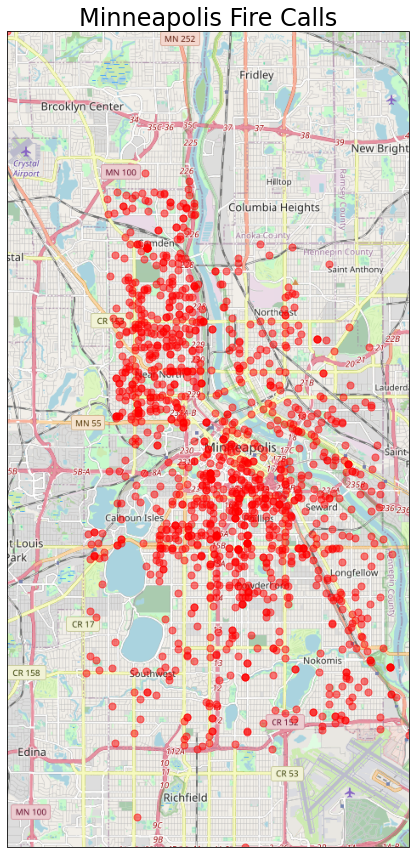

In [11]:
plot_fire_map(2017)

In [12]:
# Years with some incorrect locations: 2016, 2020
fires.loc[fires.longitude > -90]

FID     inci_no                                           descript  \
38236  NaN  0026882     Dumpster or other outside trash receptacle fir...   
38237  NaN  0026886     Dumpster or other outside trash receptacle fir...   
38238  NaN  0027005     Outside rubbish, trash or waste fire          ...   
38239  NaN  0027024     Outside rubbish, trash or waste fire          ...   
38240  NaN  0027067     Excessive heat, scorch burns with no ignition ...   
...    ...         ...                                                ...   
38296  NaN  0030463     Passenger vehicle fire                        ...   
38297  NaN  0030615     Passenger vehicle fire                        ...   
38298  NaN  0030851     Outside rubbish, trash or waste fire          ...   
38299  NaN  0030887     Passenger vehicle fire                        ...   
46569  NaN  20-0015328  Special outside fire, Other                   ...   

         alm_date station    number                     street st_type  \
38236  2016/08/02     21   2716      38                           ST     
38237  2016/08/02     06             Franklin                     AVE    
38238  2016/08/02     07   2100      Elliot                       AVE    
38239  2016/08/03     05             Cedar                        AVE    
38240  2016/08/03     21   4222      Lake                         ST     
...           ...     ...       ...                        ...     ...   
38296  2016/08/28     16   1515      Washburn                     AVE    
38297  2016/08/30     06   1300-130  Interstate 94 Wb                    
38298  2016/08/31     05   3129      Oakland                      AVE    
38299  2016/09/01     06             14                           ST     
46569  2020/05/02          254       9                            AVE    

      st_suffix                                    addr_2         apt_room  \
38236        E                                                               
38237        W                                                               
38238        S                                                               
38239        S                                                               
38240        E                                                               
...         ...                                       ...              ...   
38296        N                                                               
38297                                                                        
38298                                                                        
38299        W                                                               
46569        N                                                               

      xst_prefix                    xstreet xst_type xst_suffix  latitude  \
38236                                                                 0.0   
38237         S   Hennepin                      AVE                   0.0   
38238                                                                 0.0   
38239         E   Lake                          ST                    0.0   
38240                                                                 0.0   
...          ...                        ...      ...        ...       ...   
38296                                                                 0.0   
38297                                                                 0.0   
38298                                                                 0.0   
38299             Willow                        ST                    0.0   
46569                                                                 0.0   

       longitude inci_type    clr_date  alarms  complete    number  \
38236        0.0       154  2016/08/02       1         1  2716       
38237        0.0       154  2016/08/02       1         1             
38238        0.0       151  2016/08/02       1         1  2100       
38239        0.0       151  2016/08/03       1     

In [95]:
import requests
import urllib.parse

address = 'Shivaji Nagar, Bangalore, KA 560001'
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

response = requests.get(url).json()
print(response[0]["lat"])
print(response[0]["lon"])

12.9801559
77.6023714


In [145]:
fires.loc[fires.latitude == 0].head()

FID     inci_no                                           descript  \
38236  NaN  0026882     Dumpster or other outside trash receptacle fir...   
38237  NaN  0026886     Dumpster or other outside trash receptacle fir...   
38238  NaN  0027005     Outside rubbish, trash or waste fire          ...   
38239  NaN  0027024     Outside rubbish, trash or waste fire          ...   
38240  NaN  0027067     Excessive heat, scorch burns with no ignition ...   

         alm_date station    number                     street st_type  \
38236  2016/08/02     21   2716      38                           ST     
38237  2016/08/02     06             Franklin                     AVE    
38238  2016/08/02     07   2100      Elliot                       AVE    
38239  2016/08/03     05             Cedar                        AVE    
38240  2016/08/03     21   4222      Lake                         ST     

      st_suffix                                    addr_2         apt_room  \
38236        E                                                               
38237        W                                                               
38238        S                                                               
38239        S                                                               
38240        E                                                               

      xst_prefix                    xstreet xst_type xst_suffix  latitude  \
38236                                                                 0.0   
38237         S   Hennepin                      AVE                   0.0   
38238                                                                 0.0   
38239         E   Lake                          ST                    0.0   
38240                                                                 0.0   

       longitude inci_type    clr_date  alarms  complete  confirmed_fire  \
38236        0.0       154  2016/08/02       1         1            True   
38237        0.0       154  2016/08/02       1         1            True   
38238        0.0       151  2016/08/02       1         1            True   
38239        0.0       151  2016/08/03       1         1            True   
38240        0.0       251  2016/08/03       1         1            True   

           alarm_datetime      clear_datetime  
38236 2016-08-02 05:44:50 2016-08-02 06:20:14  
38237 2016-08-02 06:16:10 2016-08-02 06:33:03  
38238 2016-08-02 22:41:07 2016-08-02 22:56:13  
38239 2016-08-03 01:09:16 2016-08-03 01:19:09  
38240 2016-08-03 11:37:01 2016-08-03 14:39:18

In [146]:
test_row = fires.loc[fires.latitude == 0].iloc[2]
address = re.sub('\s+', ' ', f'{test_row.number} {test_row.street} {test_row.st_type} {test_row.st_suffix.strip()}, Minneapolis, MN')
address

'2100 Elliot AVE S, Minneapolis, MN'

In [147]:
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

response = requests.get(url).json()
print(response[0]["lat"])
print(response[0]["lon"])

44.9617
-93.261202


In [188]:
def get_lat(row):
    if row.latitude == 0:
        address = re.sub('\s+', ' ', f'{row.number}+{row.street}+{row.st_type}+{row.st_suffix.strip()}+Minneapolis+MN')
        url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

        response = requests.get(url).json()
        try:
            return response[0]["lat"]
        except:
            return np.nan
    else:
        return row.latitude

def get_lon(row):
    if row.longitude == 0:
        address = re.sub('\s+', ' ', f'{row.number}+{row.street}+{row.st_type}+{row.st_suffix.strip()}+Minneapolis+MN')
        url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

        response = requests.get(url).json()
        try:
            return response[0]["lon"]
        except:
            return np.nan
    else:
        return row.longitude

In [187]:
fires.loc[fires.latitude == 0].head()

FID     inci_no                                           descript  \
38236  NaN  0026882     Dumpster or other outside trash receptacle fir...   
38237  NaN  0026886     Dumpster or other outside trash receptacle fir...   
38238  NaN  0027005     Outside rubbish, trash or waste fire          ...   
38239  NaN  0027024     Outside rubbish, trash or waste fire          ...   
38240  NaN  0027067     Excessive heat, scorch burns with no ignition ...   

         alm_date station    number                     street st_type  \
38236  2016/08/02     21   2716      38                           ST     
38237  2016/08/02     06             Franklin                     AVE    
38238  2016/08/02     07   2100      Elliot                       AVE    
38239  2016/08/03     05             Cedar                        AVE    
38240  2016/08/03     21   4222      Lake                         ST     

      st_suffix                                    addr_2         apt_room  \
38236        E                                                               
38237        W                                                               
38238        S                                                               
38239        S                                                               
38240        E                                                               

      xst_prefix                    xstreet xst_type xst_suffix  latitude  \
38236                                                                 0.0   
38237         S   Hennepin                      AVE                   0.0   
38238                                                                 0.0   
38239         E   Lake                          ST                    0.0   
38240                                                                 0.0   

       longitude inci_type    clr_date  alarms  complete  confirmed_fire  \
38236        0.0       154  2016/08/02       1         1            True   
38237        0.0       154  2016/08/02       1         1            True   
38238        0.0       151  2016/08/02       1         1            True   
38239        0.0       151  2016/08/03       1         1            True   
38240        0.0       251  2016/08/03       1         1            True   

           alarm_datetime      clear_datetime     new_lat      new_lon  
38236 2016-08-02 05:44:50 2016-08-02 06:20:14         0.0          0.0  
38237 2016-08-02 06:16:10 2016-08-02 06:33:03  44.9627504  -93.3054853  
38238 2016-08-02 22:41:07 2016-08-02 22:56:13     44.9617   -93.261202  
38239 2016-08-03 01:09:16 2016-08-03 01:19:09   44.891355  -93.2468121  
38240 2016-08-03 11:37:01 2016-08-03 14:39:18         0.0          0.0

In [189]:
fires['new_lat'] = fires.apply(get_lat, axis=1)
fires['new_lon'] = fires.apply(get_lon, axis=1)

In [190]:
print(len(fires.loc[fires.latitude != fires.new_lat]))
print(len(fires.loc[fires.longitude != fires.new_lon]))

64
64


In [192]:
fires.head()

FID     inci_no                                           descript  \
38236  NaN  0026882     Dumpster or other outside trash receptacle fir...   
38237  NaN  0026886     Dumpster or other outside trash receptacle fir...   
38238  NaN  0027005     Outside rubbish, trash or waste fire          ...   
38239  NaN  0027024     Outside rubbish, trash or waste fire          ...   
38240  NaN  0027067     Excessive heat, scorch burns with no ignition ...   

         alm_date station    number                     street st_type  \
38236  2016/08/02     21   2716      38                           ST     
38237  2016/08/02     06             Franklin                     AVE    
38238  2016/08/02     07   2100      Elliot                       AVE    
38239  2016/08/03     05             Cedar                        AVE    
38240  2016/08/03     21   4222      Lake                         ST     

      st_suffix                                    addr_2         apt_room  \
38236        E                                                               
38237        W                                                               
38238        S                                                               
38239        S                                                               
38240        E                                                               

      xst_prefix                    xstreet xst_type xst_suffix  latitude  \
38236                                                                 0.0   
38237         S   Hennepin                      AVE                   0.0   
38238                                                                 0.0   
38239         E   Lake                          ST                    0.0   
38240                                                                 0.0   

       longitude inci_type    clr_date  alarms  complete  confirmed_fire  \
38236        0.0       154  2016/08/02       1         1            True   
38237        0.0       154  2016/08/02       1         1            True   
38238        0.0       151  2016/08/02       1         1            True   
38239        0.0       151  2016/08/03       1         1            True   
38240        0.0       251  2016/08/03       1         1            True   

           alarm_datetime      clear_datetime     new_lat      new_lon  
38236 2016-08-02 05:44:50 2016-08-02 06:20:14         NaN          NaN  
38237 2016-08-02 06:16:10 2016-08-02 06:33:03  44.9627504  -93.3054853  
38238 2016-08-02 22:41:07 2016-08-02 22:56:13     44.9617   -93.261202  
38239 2016-08-03 01:09:16 2016-08-03 01:19:09   44.891355  -93.2468121  
38240 2016-08-03 11:37:01 2016-08-03 14:39:18         NaN          NaN

In [203]:
fires.loc[fires.new_lat.isna()]

FID     inci_no                                           descript  \
38236  NaN  0026882     Dumpster or other outside trash receptacle fir...   
38240  NaN  0027067     Excessive heat, scorch burns with no ignition ...   
38244  NaN  0027398     Natural vegetation fire, Other                ...   
38248  NaN  0027619     Brush or brush-and-grass mixture fire         ...   
38249  NaN  0027623     Passenger vehicle fire                        ...   
38254  NaN  0027945     Brush or brush-and-grass mixture fire         ...   
38256  NaN  0027961     Outside rubbish, trash or waste fire          ...   
38257  NaN  0028044     Dumpster or other outside trash receptacle fir...   
38265  NaN  0028438     Passenger vehicle fire                        ...   
38273  NaN  0028946     Passenger vehicle fire                        ...   
38274  NaN  0029006     Passenger vehicle fire                        ...   
38277  NaN  0029069     Outside rubbish, trash or waste fire          ...   
38278  NaN  0029280     Outside rubbish, trash or waste fire          ...   
38279  NaN  0029305     Passenger vehicle fire                        ...   
38280  NaN  0029519     Excessive heat, scorch burns with no ignition ...   
38282  NaN  0029655     Natural vegetation fire, Other                ...   
38286  NaN  0030035     Passenger vehicle fire                        ...   
38289  NaN  0030084     Special outside fire, Other                   ...   
38292  NaN  0030190     Excessive heat, scorch burns with no ignition ...   
38293  NaN  0030216     Natural vegetation fire, Other                ...   
38294  NaN  0030284     Special outside fire, Other                   ...   
38295  NaN  0030327     Outside rubbish, trash or waste fire          ...   
38297  NaN  0030615     Passenger vehicle fire                        ...   
46569  NaN  20-0015328  Special outside fire, Other                   ...   

         alm_date station    number                     street st_type  \
38236  2016/08/02     21   2716      38                           ST     
38240  2016/08/03     21   4222      Lake                         ST     
38244  2016/08/05     05             24                           AVE    
38248  2016/08/07     04   1315      River                        RD     
38249  2016/08/07     15             18                           AVE    
38254  2016/08/10     04   1401      River                        RD     
38256  2016/08/10     08   304       Lake                         ST     
38257  2016/08/10     14   200-201   Interstate 94 Wb                    
38265  2016/08/13     04   525       7                            ST     
38273  2016/08/17     06   100       Interstate 94 Eb                    
38274  2016/08/17     27   4600      INTERSTATE 35W SB                   
38277  2016/08/18     07   3119      26                           ST     
38278  2016/08/19     06   1301      2                            AVE    
38279  2016/08/20     07             28                           AVE    
38280  2016/08/21     27   6013      5                            AVE    
38282  2016/08/22     04   2024      LYNDALE                      AVE    
38286  2016/08/25     21   3338      25                           AVE    
38289  2016/08/26     11   612       6                            AVE    
38292  2016/08/26     02   414       22                           AVE    
38293  2016/08/26     05   3525      16                           AVE    
38294  2016/08/27     02   2000      2                            ST     
38295  2016/08/27     05   3012      18                           AVE    
38297  2016/08/30     06   1300-130  Interstate 94 Wb                    
46569  2020/05/02          254       9                            AVE    

      st_suffix                                    addr_2         apt_room  \
38236        E                                                               
38240        E                                                            

In [212]:
fires.loc[fires.new_lat.isna()]

FID     inci_no                                           descript  \
38236  NaN  0026882     Dumpster or other outside trash receptacle fir...   
38240  NaN  0027067     Excessive heat, scorch burns with no ignition ...   
38244  NaN  0027398     Natural vegetation fire, Other                ...   
38248  NaN  0027619     Brush or brush-and-grass mixture fire         ...   
38249  NaN  0027623     Passenger vehicle fire                        ...   
38254  NaN  0027945     Brush or brush-and-grass mixture fire         ...   
38256  NaN  0027961     Outside rubbish, trash or waste fire          ...   
38257  NaN  0028044     Dumpster or other outside trash receptacle fir...   
38265  NaN  0028438     Passenger vehicle fire                        ...   
38273  NaN  0028946     Passenger vehicle fire                        ...   
38274  NaN  0029006     Passenger vehicle fire                        ...   
38277  NaN  0029069     Outside rubbish, trash or waste fire          ...   
38278  NaN  0029280     Outside rubbish, trash or waste fire          ...   
38279  NaN  0029305     Passenger vehicle fire                        ...   
38280  NaN  0029519     Excessive heat, scorch burns with no ignition ...   
38282  NaN  0029655     Natural vegetation fire, Other                ...   
38286  NaN  0030035     Passenger vehicle fire                        ...   
38289  NaN  0030084     Special outside fire, Other                   ...   
38292  NaN  0030190     Excessive heat, scorch burns with no ignition ...   
38293  NaN  0030216     Natural vegetation fire, Other                ...   
38294  NaN  0030284     Special outside fire, Other                   ...   
38295  NaN  0030327     Outside rubbish, trash or waste fire          ...   
38297  NaN  0030615     Passenger vehicle fire                        ...   
46569  NaN  20-0015328  Special outside fire, Other                   ...   

         alm_date station    number                     street st_type  \
38236  2016/08/02     21   2716      38                           ST     
38240  2016/08/03     21   4222      Lake                         ST     
38244  2016/08/05     05             24                           AVE    
38248  2016/08/07     04   1315      River                        RD     
38249  2016/08/07     15             18                           AVE    
38254  2016/08/10     04   1401      River                        RD     
38256  2016/08/10     08   304       Lake                         ST     
38257  2016/08/10     14   200-201   Interstate 94 Wb                    
38265  2016/08/13     04   525       7                            ST     
38273  2016/08/17     06   100       Interstate 94 Eb                    
38274  2016/08/17     27   4600      INTERSTATE 35W SB                   
38277  2016/08/18     07   3119      26                           ST     
38278  2016/08/19     06   1301      2                            AVE    
38279  2016/08/20     07             28                           AVE    
38280  2016/08/21     27   6013      5                            AVE    
38282  2016/08/22     04   2024      LYNDALE                      AVE    
38286  2016/08/25     21   3338      25                           AVE    
38289  2016/08/26     11   612       6                            AVE    
38292  2016/08/26     02   414       22                           AVE    
38293  2016/08/26     05   3525      16                           AVE    
38294  2016/08/27     02   2000      2                            ST     
38295  2016/08/27     05   3012      18                           AVE    
38297  2016/08/30     06   1300-130  Interstate 94 Wb                    
46569  2020/05/02          254       9                            AVE    

      st_suffix                                    addr_2         apt_room  \
38236        E                                                               
38240        E                                                            

In [211]:
fires.drop(['latitude', 'longitude'], axis=1).rename(columns={'new_lat':'latitude', 'new_lon':'longitude'}).to_csv('../data/confirmed_fires.csv', index=False)

In [34]:
min_date = datetime.date(2020, 1, 1)
max_date = datetime.date(2020, 12, 31)
# df.loc[min_date <= df.alarm_datetime.dt.date <= max_date]

In [35]:
min_date

datetime.date(2020, 1, 1)

In [36]:
max_date

datetime.date(2020, 12, 31)

In [41]:
fires.alarm_datetime

38236   2016-08-02 05:44:50
38237   2016-08-02 06:16:10
38238   2016-08-02 22:41:07
38239   2016-08-03 01:09:16
38240   2016-08-03 11:37:01
                ...        
46033   2022-04-18 10:31:57
46245   2022-04-19 09:02:55
46246   2022-04-19 11:49:26
46247   2022-04-19 12:31:35
46303   2022-04-20 10:21:29
Name: alarm_datetime, Length: 49525, dtype: datetime64[ns]

In [60]:
df = fires
year_choice = 2020
fires.loc[fires.alarm_datetime.dt.year == year_choice].alarm_datetime.min().date()

datetime.date(2020, 1, 1)

In [71]:
fires.alarm_datetime.dt.date.apply(date.strftime('M D, YYYY'))

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'str' object

In [94]:
max_date.strftime('%B %d, %Y')

'December 31, 2020'

# Working on map areas

In [3]:
districts = gpd.read_file('../data/Fire_Districts.geojson')

In [4]:
districts

FID DISTRICT  SHAPE_Length  SHAPE_Area  \
0    1        1      0.216853    0.001462   
1    2        2      0.354314    0.004677   
2    3        3      0.348023    0.003527   
3    4        4      0.294876    0.003392   
4    5        5      0.021866    0.000023   
5    6        5      0.303671    0.003563   

                                            geometry  
0  MULTIPOLYGON (((-93.26367 44.98413, -93.26312 ...  
1  MULTIPOLYGON (((-93.30455 44.96643, -93.30375 ...  
2  MULTIPOLYGON (((-93.24455 44.97807, -93.24436 ...  
3  MULTIPOLYGON (((-93.31950 45.05125, -93.31741 ...  
4  MULTIPOLYGON (((-93.25916 44.98427, -93.25934 ...  
5  MULTIPOLYGON (((-93.27726 45.03657, -93.27726 ...

In [7]:
districts.explore()

In [8]:
station_areas = gpd.read_file('../data/Fire_Stations_Areas.geojson')

In [9]:
station_areas.explore()

In [10]:
station_areas

OBJECTID STATION  Shape_STArea__  Shape_STLength__   Shape__Area  \
0          1       1    2.849868e+07      26849.444305  5.290298e+06   
1          2      11    2.156785e+06       6643.794578  4.005434e+05   
2          3      11    6.988202e+07      50460.675944  1.298023e+07   
3          4      12    1.057349e+08      68669.014073  1.958241e+07   
4          5      14    9.534733e+07      47844.855457  1.772315e+07   
5          6      15    1.185700e+08      52307.474888  2.204235e+07   
6          7      16    8.083788e+07      51499.690390  1.500892e+07   
7          8      17    1.066310e+08      51754.614040  1.976329e+07   
8          9      19    7.271874e+07      41164.124843  1.349937e+07   
9         10       2    7.493135e+07      50680.778311  1.392880e+07   
10        11      20    8.643020e+07      43680.556222  1.607962e+07   
11        12      21    1.184510e+08      51244.007298  2.195734e+07   
12        13      22    1.049380e+08      49300.831715  1.946117e+07   
13        14      27    1.210857e+08      58173.762011  2.242232e+07   
14        15      28    1.090457e+08      50511.371653  2.019930e+07   
15        16       4    5.728720e+07      40326.636136  1.064097e+07   
16        17       5    4.441661e+07      32684.972305  8.237971e+06   
17        18       6    5.138123e+07      36618.832991  9.535635e+06   
18        19       7    6.443429e+07      43643.599412  1.195527e+07   
19        20       8    5.815241e+07      35508.788777  1.078637e+07   

    Shape__Length                                           geometry  
0    11565.433054  POLYGON ((-93.26367 44.98413, -93.26312 44.983...  
1     2863.492982  POLYGON ((-93.25916 44.98427, -93.25934 44.984...  
2    21743.702335  POLYGON ((-93.24532 45.00237, -93.24499 45.002...  
3    29553.417577  POLYGON ((-93.23324 44.92330, -93.23319 44.923...  
4    20630.998276  POLYGON ((-93.31483 45.02952, -93.31355 45.029...  
5    22550.552096  POLYGON ((-93.22690 45.02773, -93.22688 45.025...  
6    22190.826989  POLYGON ((-93.30444 44.99742, -93.30444 44.996...  
7    22280.863919  POLYGON ((-93.26647 44.94667, -93.26645 44.945...  
8    17742.701927  POLYGON ((-93.21516 44.98977, -93.21520 44.987...  
9    21863.343992  POLYGON ((-93.27726 45.03657, -93.27726 45.035...  
10   18839.253760  POLYGON ((-93.28292 45.05112, -93.28289 45.051...  
11   22066.367623  POLYGON ((-93.20515 44.95037, -93.20493 44.950...  
12   21235.291411  POLYGON ((-93.30455 44.96643, -93.30375 44.966...  
13   25029.732667  POLYGON ((-93.27471 44.92147, -93.27472 44.919...  
14   21748.106241  POLYGON ((-93.30812 44.93049, -93.30804 44.930...  
15   17383.099806  POLYGON ((-93.27510 45.00591, -93.27511 45.005...  
16   14078.071724  POLYGON ((-93.24984 44.96093, -93.24986 44.959...  
17   15765.323343  POLYGON ((-93.27034 44.97478, -93.26898 44.974...  
18   18795.703833  POLYGON ((-93.24455 44.97807, -93.24436 44.977...  
19   15287.156769  POLYGON ((-93.29692 44.96092, -93.29565 44.960...

In [11]:
districts

FID DISTRICT  SHAPE_Length  SHAPE_Area  \
0    1        1      0.216853    0.001462   
1    2        2      0.354314    0.004677   
2    3        3      0.348023    0.003527   
3    4        4      0.294876    0.003392   
4    5        5      0.021866    0.000023   
5    6        5      0.303671    0.003563   

                                            geometry  
0  MULTIPOLYGON (((-93.26367 44.98413, -93.26312 ...  
1  MULTIPOLYGON (((-93.30455 44.96643, -93.30375 ...  
2  MULTIPOLYGON (((-93.24455 44.97807, -93.24436 ...  
3  MULTIPOLYGON (((-93.31950 45.05125, -93.31741 ...  
4  MULTIPOLYGON (((-93.25916 44.98427, -93.25934 ...  
5  MULTIPOLYGON (((-93.27726 45.03657, -93.27726 ...

In [26]:
districts.DISTRICT

0    1
1    2
2    3
3    4
4    5
5    5
Name: DISTRICT, dtype: object

In [31]:
gpd.explore?

Type:        module
String form: <module 'geopandas.explore' from '/Users/cerickson30/opt/miniconda3/lib/python3.8/site-packages/geopandas/explore.py'>
File:        ~/opt/miniconda3/lib/python3.8/site-packages/geopandas/explore.py
Docstring:   <no docstring>


In [34]:
gpd.overlay(station_areas, districts).explore('DISTRICT', cmap='Dark2')
# station_areas.explore()

In [35]:
nhoods = gpd.read_file('../data/Minneapolis_Neighborhoods.geojson')

In [37]:
nhoods

OBJECTID     INT_REFNO PREFIX       UDI SYMBOL_NAM             BDNAME  \
0          1 -2.144135e+09  REFNO  23152.00   WARDAREA      Phillips West   
1          2 -2.144131e+09  REFNO  23187.00   WARDAREA      Downtown West   
2          3 -2.144131e+09  REFNO  23188.00   WARDAREA      Downtown East   
3          4  0.000000e+00  REFNO  23189.00   WARDAREA    Ventura Village   
4          5 -2.144137e+09  REFNO  23129.00   WARDAREA  Sumner - Glenwood   
..       ...           ...    ...       ...        ...                ...   
82        83 -2.144139e+09  REFNO  23113.00   WARDAREA   Marshall Terrace   
83        84 -2.144135e+09  REFNO  23151.00   WARDAREA           Whittier   
84        85 -2.144135e+09  REFNO  23153.00   WARDAREA            Lyndale   
85        86 -2.144135e+09  REFNO  23146.00   WARDAREA  East Bde Maka Ska   
86        87 -2.144135e+09  REFNO  23149.00   WARDAREA      West Maka Ska   

   BDNUM TEXT_NBR  SHAPE_Length  SHAPE_Area  \
0     90       90      0.045801    0.000113   
1     87       87      0.063671    0.000220   
2     88       88      0.045179    0.000109   
3     89       89      0.059590    0.000134   
4     29       29      0.035535    0.000061   
..   ...      ...           ...         ...   
82    13       13      0.063154    0.000208   
83    51       51      0.062146    0.000239   
84    53       53      0.048130    0.000143   
85    46       46      0.045640    0.000130   
86    49       49      0.058273    0.000197   

                                             geometry  
0   MULTIPOLYGON (((-93.26258 44.96091, -93.26258 ...  
1   MULTIPOLYGON (((-93.26011 44.98300, -93.26010 ...  
2   MULTIPOLYGON (((-93.24499 44.97893, -93.24499 ...  
3   MULTIPOLYGON (((-93.24958 44.96630, -93.24951 ...  
4   MULTIPOLYGON (((-93.28830 44.98904, -93.28830 ...  
..                                                ...  
82  MULTIPOLYGON (((-93.27792 45.02761, -93.27768 ...  
83  MULTIPOLYGON (((-93.26954 44.96269, -93.26954 ...  
84  MULTIPOLYGON (((-93.28429 44.94836, -93.28302 ...  
85  MULTIPOLYGON (((-93.30211 44.94837, -93.30083 ...  
86  MULTIPOLYGON (((-93.32671 44.94845, -93.32628 ...  

[87 rows x 11 columns]

In [43]:
station_districts = gpd.overlay(station_areas, districts)

In [48]:
gpd.overlay(nhoods, station_districts, keep_geom_type=False).head()

OBJECTID_1     INT_REFNO PREFIX       UDI SYMBOL_NAM           BDNAME  \
0           1 -2.144135e+09  REFNO  23152.00   WARDAREA    Phillips West   
1          64 -2.144135e+09  REFNO  23154.00   WARDAREA          Central   
2           1 -2.144135e+09  REFNO  23152.00   WARDAREA    Phillips West   
3           2 -2.144131e+09  REFNO  23187.00   WARDAREA    Downtown West   
4           4  0.000000e+00  REFNO  23189.00   WARDAREA  Ventura Village   

  BDNUM TEXT_NBR  SHAPE_Length_1  SHAPE_Area_1  OBJECTID_2 STATION  \
0    90       90        0.045801      0.000113          17       5   
1    54       54        0.052652      0.000172          17       5   
2    90       90        0.045801      0.000113          18       6   
3    87       87        0.063671      0.000220          18       6   
4    89       89        0.059590      0.000134          18       6   

   Shape_STArea__  Shape_STLength__   Shape__Area  Shape__Length  FID  \
0    4.441661e+07      32684.972305  8.237971e+06   14078.071724    1   
1    4.441661e+07      32684.972305  8.237971e+06   14078.071724    1   
2    5.138123e+07      36618.832991  9.535635e+06   15765.323343    1   
3    5.138123e+07      36618.832991  9.535635e+06   15765.323343    1   
4    5.138123e+07      36618.832991  9.535635e+06   15765.323343    1   

  DISTRICT  SHAPE_Length_2  SHAPE_Area_2  \
0        1        0.216853      0.001462   
1        1        0.216853      0.001462   
2        1        0.216853      0.001462   
3        1        0.216853      0.001462   
4        1        0.216853      0.001462   

                                            geometry  
0  MULTIPOLYGON (((-93.26405 44.95375, -93.26388 ...  
1  POLYGON ((-93.26392 44.94667, -93.26502 44.946...  
2  POLYGON ((-93.26920 44.96090, -93.26898 44.960...  
3  POLYGON ((-93.26921 44.96995, -93.26921 44.969...  
4  POLYGON ((-93.26512 44.96091, -93.26512 44.960...

In [49]:
gpd.overlay(nhoods, station_districts, keep_geom_type=False).explore('DISTRICT',
     cmap='Dark2',
     tooltip = ['BDNAME', 'STATION', 'DISTRICT'])

/Users/cerickson30/opt/miniconda3/lib/python3.8/site-packages/folium/features.py:906: UserWarning: GeoJsonTooltip is not configured to render for GeoJson GeometryCollection geometries. Please consider reworking these features: [{'BDNAME': 'Elliot Park', 'BDNUM': '33', 'DISTRICT': '3', 'FID': 3, 'INT_REFNO': -2144136700.0, 'OBJECTID_1': 75, 'OBJECTID_2': 1, 'PREFIX': 'REFNO', 'SHAPE_Area_1': 0.00011192493679378565, 'SHAPE_Area_2': 0.0035266757616584, 'SHAPE_Length_1': 0.045467229928482754, 'SHAPE_Length_2': 0.3480233600857039, 'STATION': '1', 'SYMBOL_NAM': 'WARDAREA', 'Shape_STArea__': 28498684.4015732, 'Shape_STLength__': 26849.44430536, 'Shape__Area': 5290298.09765625, 'Shape__Length': 11565.4330542936, 'TEXT_NBR': '33', 'UDI': '23133.00', '__folium_color': '#66a61e'}] to MultiPolygon for full functionality.
https://tools.ietf.org/html/rfc7946#page-9
  warnings.warn(
